In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
from calendar import monthrange
from matplotlib import pyplot as plt, colors
from windrose import WindroseAxes
from cmocean import cm as cmo
from tqdm.notebook import tqdm
from salishsea_tools import wind_tools, places, viz_tools
import pandas as pd
from scipy.stats import sem
import scipy.stats as stats

%matplotlib inline

In [2]:
df=pd.read_csv('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/NPGO/FraserRiver_Daily_ECCC.csv',skiprows=1)

In [3]:
df.drop(df.loc[df.PARAM==2].index,inplace=True)

In [4]:
df.rename(columns={'Value':'Flow'}, inplace=True)

In [5]:
df2=df.loc[(df['YEAR'] >=2007)&(df['YEAR'] <= 2020)]

In [6]:
#riv_time=dfFra2['Date'].values
Flow=df2['Flow'].values

In [7]:
View2007=df2.loc[df2.YEAR==2007].groupby(['DD']).mean()
View2008=df2.loc[df2.YEAR==2008].groupby(['DD']).mean()
View2009=df2.loc[df2.YEAR==2009].groupby(['DD']).mean()
View2010=df2.loc[df2.YEAR==2010].groupby(['DD']).mean()
View2011=df2.loc[df2.YEAR==2011].groupby(['DD']).mean()
View2012=df2.loc[df2.YEAR==2012].groupby(['DD']).mean()
View2013=df2.loc[df2.YEAR==2013].groupby(['DD']).mean()
View2014=df2.loc[df2.YEAR==2014].groupby(['DD']).mean()
View2015=df2.loc[df2.YEAR==2015].groupby(['DD']).mean()
View2016=df2.loc[df2.YEAR==2016].groupby(['DD']).mean()
View2017=df2.loc[df2.YEAR==2017].groupby(['DD']).mean()
View2018=df2.loc[df2.YEAR==2018].groupby(['DD']).mean()
View2019=df2.loc[df2.YEAR==2019].groupby(['DD']).mean()
View2020=df2.loc[df2.YEAR==2020].groupby(['DD']).mean()

In [8]:
Mean=(View2007+View2008+View2009+View2010+View2011+View2012+View2013+\
      View2014+View2015+View2016+View2017+View2018+View2019+View2020)/14

### Plot Seasonal Cycles for Individual Years

Text(0.5, 0, 'Day of Year')

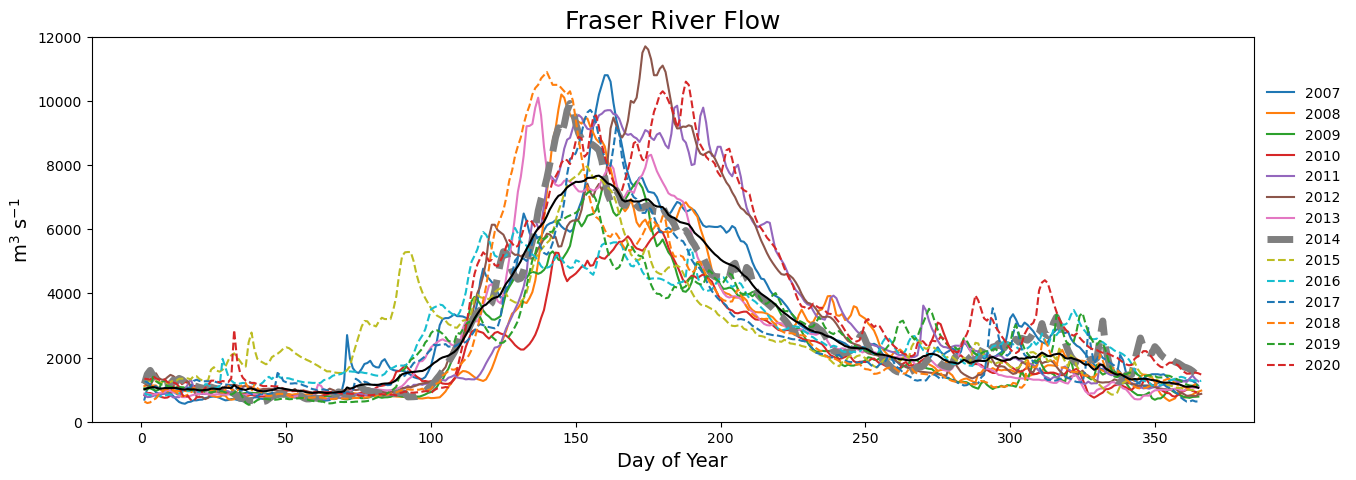

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

plt.plot(View2007.index,View2007.Flow, linestyle='-',label=2007);
plt.plot(View2008.index,View2008.Flow, linestyle='-',label=2008);
plt.plot(View2009.index,View2009.Flow, linestyle='-',label=2009);
plt.plot(View2010.index,View2010.Flow, linestyle='-',label=2010);
plt.plot(View2011.index,View2011.Flow, linestyle='-',label=2011);
plt.plot(View2012.index,View2012.Flow, linestyle='-',label=2012);
plt.plot(View2013.index,View2013.Flow, linestyle='-',label=2013);
plt.plot(View2014.index,View2014.Flow, linestyle='--',linewidth=5,label=2014);
plt.plot(View2015.index,View2015.Flow, linestyle='--',label=2015);
plt.plot(View2016.index,View2016.Flow, linestyle='--',label=2016);
plt.plot(View2017.index,View2017.Flow, linestyle='--',label=2017);
plt.plot(View2018.index,View2018.Flow, linestyle='--',label=2018);
plt.plot(View2019.index,View2019.Flow, linestyle='--',label=2019);
plt.plot(View2020.index,View2020.Flow, linestyle='--',label=2020);
plt.plot(Mean.index,Mean.Flow, linestyle='-',color='k');

ax.set_title('Fraser River Flow',fontsize=18)
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_ylim(0,12000)
ax.set_ylabel('m$^{3}$ s$^{-1}$',fontsize=14)
ax.set_xlabel('Day of Year',fontsize=14)

### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [10]:
View2008=View2008.dropna()
View2010=View2010.dropna()
View2011=View2011.dropna()
View2012=View2012.dropna()
View2015=View2015.dropna()
View2018=View2018.dropna()
View2019=View2019.dropna()
View2020=View2020.dropna()

In [11]:
ColdYears=(View2008+View2010+View2011+View2012)/4
WarmYears=(View2015+View2018+View2019+View2020)/4

In [12]:
ColdYears=ColdYears.dropna()
WarmYears=WarmYears.dropna()

[Text(1, 0, 'Jan'),
 Text(32, 0, 'Feb'),
 Text(60, 0, 'Mar'),
 Text(91, 0, 'Apr'),
 Text(121, 0, 'May'),
 Text(152, 0, 'Jun'),
 Text(182, 0, 'Jul'),
 Text(213, 0, 'Aug'),
 Text(244, 0, 'Sep'),
 Text(274, 0, 'Oct'),
 Text(305, 0, 'Nov'),
 Text(335, 0, 'Dec')]

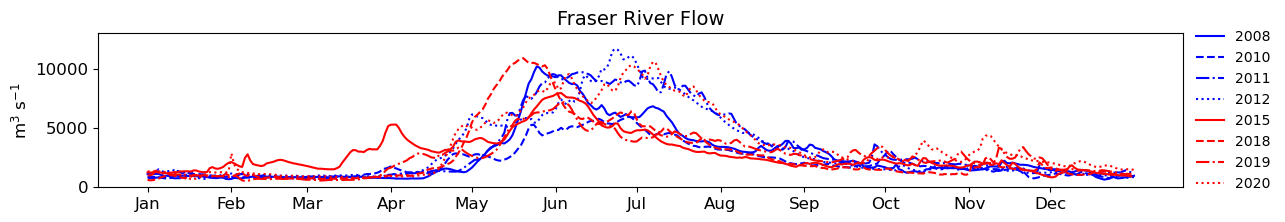

In [13]:
## Plot the coldest and warmest years only; Supp Fig. S3


fig, ax = plt.subplots(figsize=(14, 2))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

#plt.plot(Anom2007.index,Anom2007.Flow, linestyle='-',label=2007);
plt.plot(View2008.index,View2008.Flow, color='b',linestyle='-',label=2008);
#plt.plot(Anom2009.index,Anom2009.Flow, linestyle='-',label=2009);
plt.plot(View2010.index,View2010.Flow, color='b',linestyle='--',label=2010);
plt.plot(View2011.index,View2011.Flow, color='b',linestyle='-.',label=2011);
plt.plot(View2012.index,View2012.Flow, color='b',linestyle=':',label=2012);
#plt.plot(Anom2013.index,Anom2013.Flow, linestyle='-',label=2013);
#plt.plot(Anom2014.index,Anom2014.Flow, linestyle='--',label=2014);
#plt.plot(Anom2015.index,Anom2015.Flow, linestyle='--',label=2015);
#plt.plot(Anom2016.index,Anom2016.Flow, linestyle='--',label=2016);
plt.plot(View2015.index,View2015.Flow, color='r',linestyle='-',label=2015);
plt.plot(View2018.index,View2018.Flow, color='r',linestyle='--',label=2018);
plt.plot(View2019.index,View2019.Flow, color='r',linestyle='-.',label=2019);
plt.plot(View2020.index,View2020.Flow, color='r',linestyle=':',label=2020);
#plt.axhline(y=0, linestyle='-',color='k');

ax.set_title('Fraser River Flow',fontsize=14)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0,13000)
ax.set_ylabel('m$^{3}$ s$^{-1}$',fontsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xticks([1,32,60,91,121,152,182,213,244,274,305,335])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=12)
#ax.set_xticklabels([])


Text(4, 7800, '(f)')

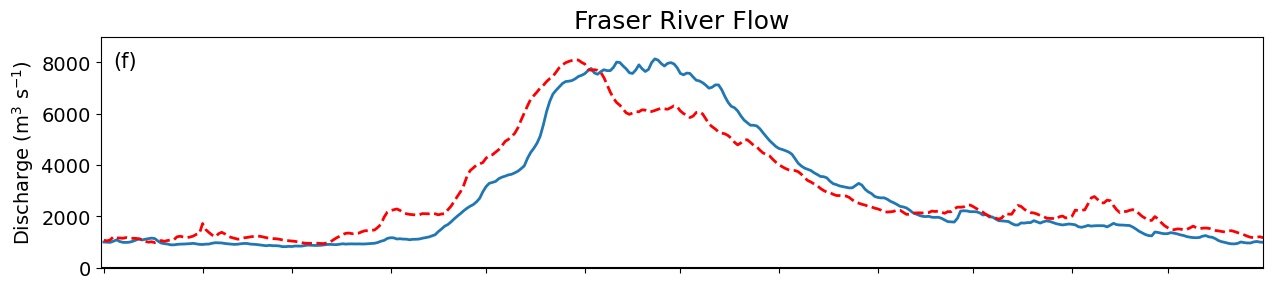

In [14]:
## Preliminary Figure 3f

fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


plt.plot(ColdYears.index,ColdYears.Flow, linestyle='-',label='Cold Years',linewidth=2);
plt.plot(WarmYears.index,WarmYears.Flow, color='r',linestyle='--',label='Warm Years',linewidth=2);

#ax.errorbar(ColdYears.index, ColdYears, yerr= sem(ColdYears_sem), capsize=3,label='NPGO+ coldest')
#ax.errorbar(xticks, NPGO_W_w2015,yerr= NPGO_W_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r')

plt.axhline(y=0, linestyle='-',color='k');

ax.set_title('Fraser River Flow',fontsize=18)
ax.legend((),frameon=False,bbox_to_anchor=(1, 1))
ax.set_ylim(0,9000)
ax.set_ylabel('Discharge (m$^{3}$ s$^{-1}$)',fontsize=14)
#ax.set_xlabel('Day of Year',fontsize=14)
ax.set_xlim(0,365)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)



ax.set_xticks([1,32,60,91,121,152,182,213,244,274,305,335])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=12)
ax.set_xticklabels([])

ax.text(4, 7800, '(f)', fontsize=15,  color='k')

#plt.fill([a, a, b, b], [0, 25, 25, 0], color = 'lightgreen', alpha = 0.1)
#plt.fill([c, c, d, d], [0, 25, 25, 0], color = 'wheat', alpha = 0.2)

#plt.savefig('Fig3f_FraserRiver.png', bbox_inches='tight',dpi=1000,transparent=False)

### Data for calculating seasonal mean values for box plots

In [15]:
Spring_C=ColdYears.Flow[60:152]
Spring_W=WarmYears.Flow[60:152]
Summer_C=ColdYears.Flow[152:213]
Summer_W=WarmYears.Flow[152:244]

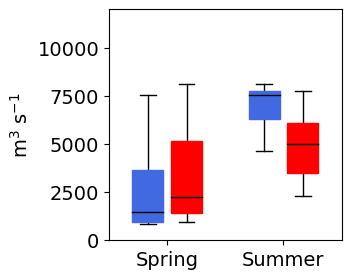

In [16]:
## Preliminary Figure 3f

def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Spring_C]
data2 = [Spring_W]
data3 = [Summer_C]
data4 = [Summer_W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(0,12000)
ax.set_ylabel('m$^{3}$ s$^{-1}$',fontsize=14)
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
#plt.savefig('Fig3f_FraserRiverBoxplots.png', bbox_inches='tight',dpi=1000,transparent=True)


plt.show()

In [17]:
Spring_C.mean()

2642.532608695652

In [18]:
Spring_W.mean()

3493.024456521739

In [19]:
Summer_C.mean()

7019.2213114754095

In [20]:
Summer_W.mean()

4871.440217391304

### t tests for differences between spring and summer of cold and warm years

In [21]:
stats.ttest_ind(a=Spring_C, b=Spring_W, equal_var=True)

Ttest_indResult(statistic=-2.5086388083115763, pvalue=0.012993588913608056)

In [22]:
stats.ttest_ind(a=Summer_C, b=Summer_W, equal_var=True)

Ttest_indResult(statistic=9.500248201808422, pvalue=4.5336070252522985e-17)